![](https://www.vmcdn.ca/f/files/kitchenertoday/images/health-and-fitness/covid-19-village-media.jpg)



# **Análisis del COVID-19 en Colombia**
## **Trabajo final: Analisis Predictivo y gestión de datos**

*Presentado por:*

- *Paula Andrea Solano Pardo*
- *Jenssy Johanna Garces Parra*
- *Ingrid Alexandra Aponte Caro*

**Paso 1**:

Importar las librerias que vamos a utilizar en el desarrollo del ejercicio. En este caso, importamos en primer lugar Pandas para la administración de las bases de datos, seguido de matplotlib que no ayuda con las graficas.

In [63]:
#En esta lianea se importan las librerias a utilizar

import pandas as pd
import matplotlib.pyplot as plt 

**Paso 2:**

Cargar la base de datos que vamos a utilizar para el desarrollo del ejercicio, en este caso, utilizamos una base de datos relacionadas en la página "Datos abiertos Colombia" que contine información a cerca del COVID- 19. esta base se carga directamente desde la página de internet.

La base, tiene 6,39 millones de filas y 23 columnas, en las que se presenta la siguiente información:

- Fecha_reporte_web	

- Id_de_caso	fecha_de_notificaci_n	

- Departamento	

- Departamento_nom	

- Ciudad_municipio

- Ciudad_municipio_nom	

- Edad	

- Unidad_medida	

- Sexo

- Tipo de contagio

- Ubicación del caso

- Estado

- Código ISO del país

- Nombre del país   


In [64]:

# Reemplaza con la ruta de tu archivo y el nombre de la hoja
archivo = '/workspaces/Intriduccion_Github/Datos/Casos_positivos_de_COVID-19.xlsb'
hoja = 'Casos_positivos_de_COVID-19_en_'

# Cargar el archivo
df = pd.read_excel(archivo, sheet_name=hoja, engine='pyxlsb')

# Ver los primeros registros
print(df.head())



   ID de caso Nombre departamento Nombre municipio  Edad  \
0     1556979               VALLE             CALI    67   
1     1556980               VALLE             CALI    66   
2     1556981               VALLE             CALI    68   
3     1556982               VALLE             CALI    74   
4     1556983               VALLE             CALI    65   

   Unidad de medida de edad Sexo Tipo de contagio UbicaciÃ³n del caso  \
0                         1    F      Comunitaria                Casa   
1                         1    F      Comunitaria                Casa   
2                         1    F      Comunitaria                Casa   
3                         1    F      Comunitaria           Fallecido   
4                         1    F      Comunitaria                Casa   

      Estado Nombre del paÃ­s  Recuperado  Fecha de inicio de sÃ­ntomas  \
0       Leve              NaN  Recuperado                       44186.0   
1       Leve              NaN  Recuperado         

In [65]:
import os
print(os.getcwd())

/workspaces/Intriduccion_Github/Notebooks


## Paso 3: Revisar la estructura del dataframe

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 15 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   ID de caso                    1048575 non-null  int64  
 1   Nombre departamento           1048575 non-null  object 
 2   Nombre municipio              1048575 non-null  object 
 3   Edad                          1048575 non-null  int64  
 4   Unidad de medida de edad      1048575 non-null  int64  
 5   Sexo                          1048575 non-null  object 
 6   Tipo de contagio              1048575 non-null  object 
 7   UbicaciÃ³n del caso           1044230 non-null  object 
 8   Estado                        1044230 non-null  object 
 9   Nombre del paÃ­s              250 non-null      object 
 10  Recuperado                    1044979 non-null  object 
 11  Fecha de inicio de sÃ­ntomas  943175 non-null   float64
 12  Fecha de muerte             

In [67]:
df.shape

(1048575, 15)

In [68]:
#En esta linea, creamos una copia de la base original, con el objetivo de no modificar los datos originales

df_2=df.copy()

In [69]:
#se cambia el nombre de las variables con el fin de eliminsar caracteres especiales

df_2.rename(columns={'Fecha de inicio de sÃ­ntomas': 'Fecha de inicio de sintomas'}, inplace=True)
df_2.rename(columns={'Fecha de recuperaciÃ³n': 'Fecha de recuperacion'}, inplace=True)
df_2.rename(columns={'Fecha de diagnÃ³stico': 'Fecha de diagnostico'}, inplace=True)
df_2.rename(columns={'UbicaciÃ³n del caso': 'Ubicacion del caso'}, inplace=True)
df_2.rename(columns={'Nombre del paÃ­s': 'Nombre del pais'}, inplace=True)

In [70]:
# Verificar el cambio de nombre en als columnas

print(df_2.columns.tolist())

['ID de caso', 'Nombre departamento', 'Nombre municipio', 'Edad', 'Unidad de medida de edad', 'Sexo', 'Tipo de contagio', 'Ubicacion del caso', 'Estado', 'Nombre del pais', 'Recuperado', 'Fecha de inicio de sintomas', 'Fecha de muerte', 'Fecha de diagnostico', 'Fecha de recuperacion']


In [71]:
# Se cambia el tiempo de variable, de manera que las fechas se reconozcan como datatime

df_2['Fecha de inicio de sintomas'] = pd.to_datetime(df_2['Fecha de inicio de sintomas'], errors='coerce')
df_2['Fecha de recuperacion'] = pd.to_datetime(df_2['Fecha de recuperacion'], errors='coerce')
df_2['Fecha de diagnostico'] = pd.to_datetime(df_2['Fecha de diagnostico'], errors='coerce')
df_2['Fecha de muerte'] = pd.to_datetime(df_2['Fecha de muerte'], errors='coerce')

## Paso 4: Descripción estadística general

In [72]:
df_2.describe(include='all')

,ID de caso,Nombre departamento,Nombre municipio,Edad,Unidad de medida de edad,Sexo,Tipo de contagio,Ubicacion del caso,Estado,Nombre del pais,Recuperado,Fecha de inicio de sintomas,Fecha de muerte,Fecha de diagnostico,Fecha de recuperacion
count,1.048575e+06,1048575,1048575,1.048575e+06,1.048575e+06,1048575,1048575,1044230,1044230,250,1044979,943175,32536,1048304,1016788
unique,NaN,37,1036,NaN,NaN,4,3,4,3,32,3,NaN,NaN,NaN,NaN
top,NaN,BOGOTA,BOGOTA,NaN,NaN,F,Comunitaria,Casa,Leve,ESTADOS UNIDOS DE AMÃ‰RICA,Recuperado,NaN,NaN,NaN,NaN
freq,NaN,316114,316114,NaN,NaN,552710,661834,1015144,1015641,97,1016788,NaN,NaN,NaN,NaN
mean,2.585944e+06,NaN,NaN,3.963330e+01,1.003176e+00,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-01 00:00:00.000044264,1970-01-01 00:00:00.000044288,1970-01-01 00:00:00.000044275,1970-01-01 00:00:00.000044289
min,4.150000e+02,NaN,NaN,1.000000e+00,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-01 00:00:00.000043896,1970-01-01 00:00:00.000043941,1970-01-01 00:00:00.000043914,1970-01-01 00:00:00.000043953
25%,2.474460e+06,NaN,NaN,2.700000e+01,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-01 00:00:00.000044276,1970-01-01 00:00:00.000044290,1970-01-01 00:00:00.000044290,1970-01-01 00:00:00.000044299
50%,2.822523e+06,NaN,NaN,3.800000e+01,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-01 00:00:00.000044302,1970-01-01 00:00:00.000044322,1970-01-01 00:00:00.000044310,1970-01-01 00:00:00.000044320
75%,3.366734e+06,NaN,NaN,5.200000e+01,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-01 00:00:00.000044333,1970-01-01 00:00:00.000044352,1970-01-01 00:00:00.000044342,1970-01-01 00:00:00.000044351
max,5.764914e+06,NaN,NaN,1.130000e+02,3.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-01 00:00:00.000044571,1970-01-01 00:00:00.000044619,1970-01-01 00:00:00.000044585,1970-01-01 00:00:00.000044628


## Paso 5: Visualización exploratoria

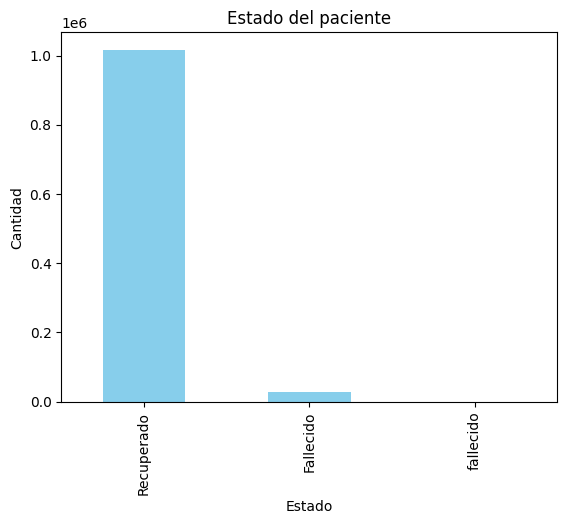

In [73]:
df_2['Recuperado'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Estado del paciente')
plt.xlabel('Estado')
plt.ylabel('Cantidad')
plt.show()



In [74]:
### Hayazgo: corregir la palabra fallecido para que solo este con mayuscula inicial
df_2['Recuperado'] = df_2['Recuperado'].str.replace('fallecido', 'Fallecido')

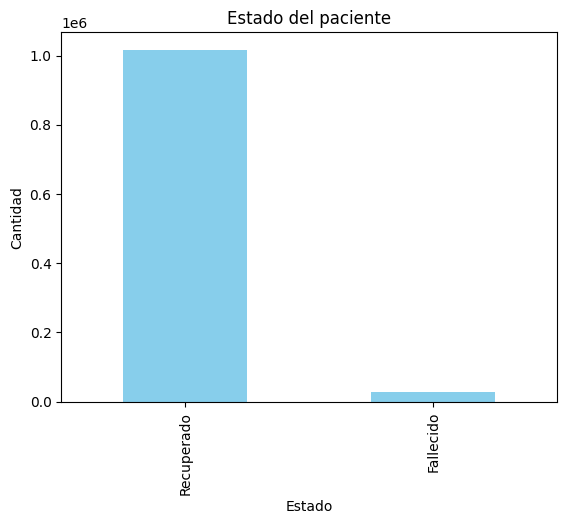

In [75]:

###Se corre la linea nuevamente con el fin de verificar que se corrigió el dato duplicado

df_2['Recuperado'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Estado del paciente')
plt.xlabel('Estado')
plt.ylabel('Cantidad')
plt.show()


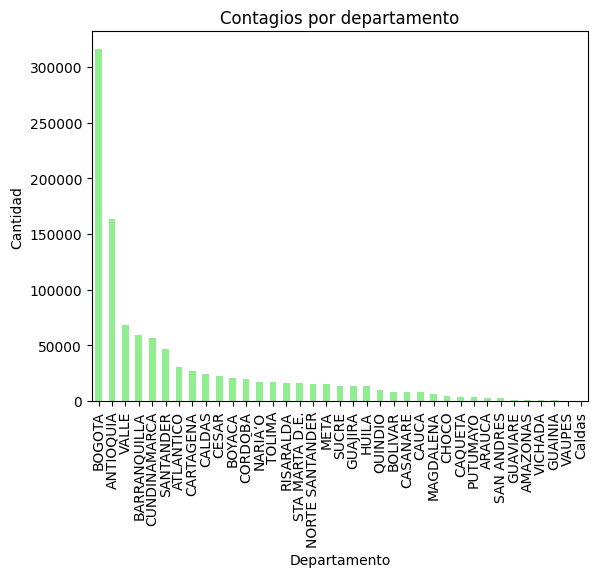

In [76]:
df_2['Nombre departamento'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Contagios por departamento')
plt.xlabel('Departamento')
plt.ylabel('Cantidad')
plt.show()

In [77]:
# Ver el nombre de las variables que hay dentro de la columna "Nombre departamento"

df['Nombre departamento'].unique()

array(['VALLE', 'ANTIOQUIA', 'BOGOTA', 'SANTANDER', 'NORTE SANTANDER',
       'CALDAS', 'CUNDINAMARCA', 'CAQUETA', 'QUINDIO', 'RISARALDA',
       'CASANARE', 'NARIÃ‘O', 'HUILA', 'CESAR', 'META', 'STA MARTA D.E.',
       'TOLIMA', 'CAUCA', 'BARRANQUILLA', 'SUCRE', 'CARTAGENA', 'BOLIVAR',
       'GUAJIRA', 'ATLANTICO', 'CORDOBA', 'MAGDALENA', 'ARAUCA', 'BOYACA',
       'SAN ANDRES', 'CHOCO', 'GUAVIARE', 'VICHADA', 'PUTUMAYO', 'VAUPES',
       'GUAINIA', 'AMAZONAS', 'Caldas'], dtype=object)

In [78]:
## Hayazgo: Corregir el mombre de los departamentos  caldas ya que aparece repetido. y ademas Nariño, ya que no se lee la letra ñ
df_2['Nombre departamento'] = df_2['Nombre departamento'].str.replace('Caldas', 'CALDAS')
df_2['Nombre departamento'] = df_2['Nombre departamento'].str.replace('NARIÃ‘O', 'NARIÑO')

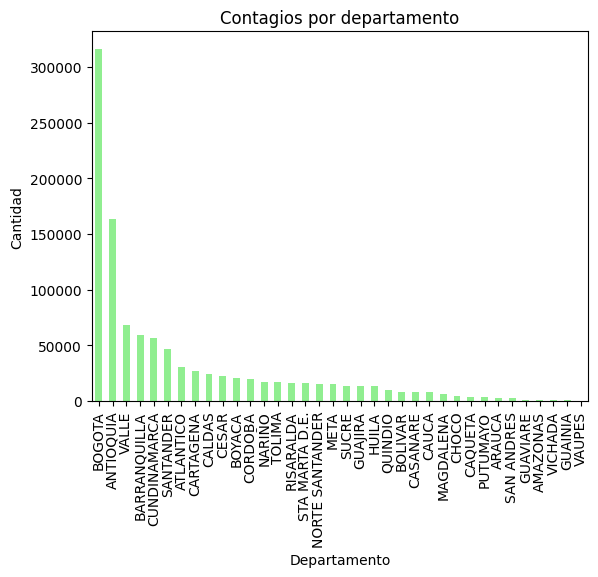

In [79]:
###Se corre la linea nuevamente con el fin de verificar que se corrigió el dato duplicado

df_2['Nombre departamento'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Contagios por departamento')
plt.xlabel('Departamento')
plt.ylabel('Cantidad')
plt.show()

In [80]:
# Filtrar datos con fechas válidas
df_2 = df_2.dropna(subset=['Fecha de diagnostico'])


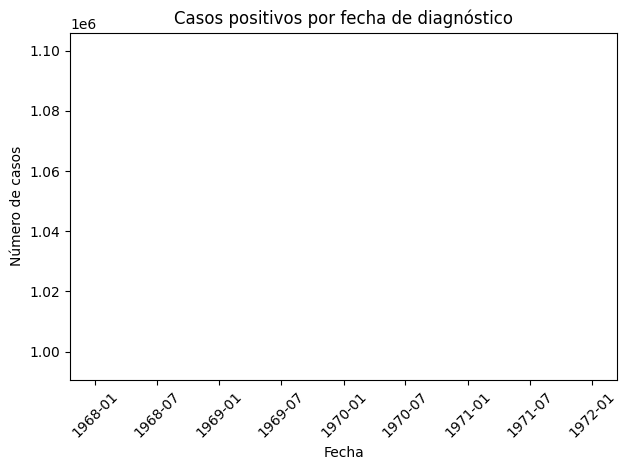

In [81]:
# Casos por fecha de diagnóstico
casos_por_fecha = df_2.groupby(df_2['Fecha de diagnostico'].dt.date).size()

casos_por_fecha.plot(kind='line')
plt.title("Casos positivos por fecha de diagnóstico")
plt.xlabel("Fecha")
plt.ylabel("Número de casos")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

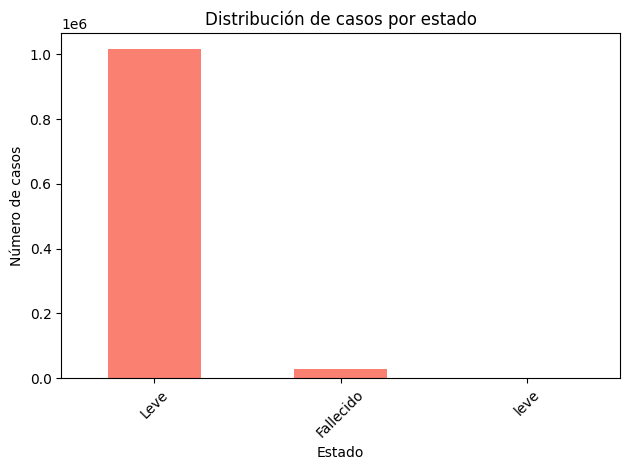

In [82]:
# Casos por estado
plt.figure()
df_2['Estado'].value_counts().plot(kind='bar', color='salmon')
plt.title("Distribución de casos por estado")
plt.xlabel("Estado")
plt.ylabel("Número de casos")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [83]:
### Hayazgo: Corregir el nombre de los estados leve
df_2['Estado'] = df_2['Estado'].str.replace('leve', 'Leve')



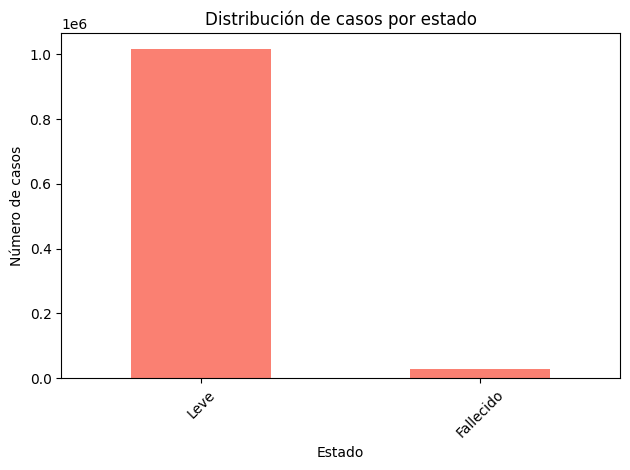

In [84]:
## se corre la linea nuevamente con el fin de verificar que se corrigió el dato duplicado
# Casos por estado
plt.figure()
df_2['Estado'].value_counts().plot(kind='bar', color='salmon')
plt.title("Distribución de casos por estado")
plt.xlabel("Estado")
plt.ylabel("Número de casos")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

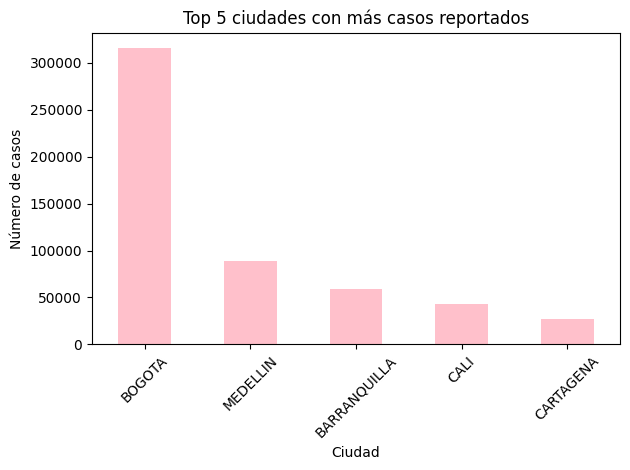

In [85]:
# Top 10 ciudades con más casos
# -----------------------------
plt.figure()
df_2['Nombre municipio'].value_counts().head(5).plot(kind='bar', color='pink')
plt.title("Top 5 ciudades con más casos reportados")
plt.xlabel("Ciudad")
plt.ylabel("Número de casos")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

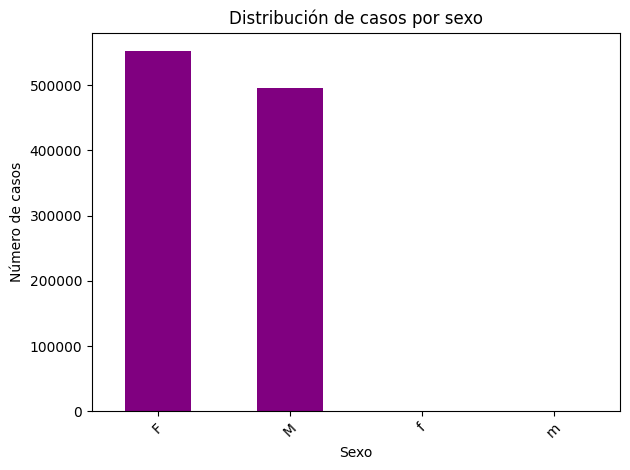

In [86]:
#Casos por sexo
plt.figure()
df_2['Sexo'].value_counts().plot(kind='bar', color='purple')
plt.title("Distribución de casos por sexo")
plt.xlabel("Sexo")
plt.ylabel("Número de casos")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [87]:
##hayazgo: Corregir el nombre de los sexos
df_2['Sexo'] = df_2['Sexo'].str.replace('f', 'F')
df_2['Sexo'] = df_2['Sexo'].str.replace('m', 'M')

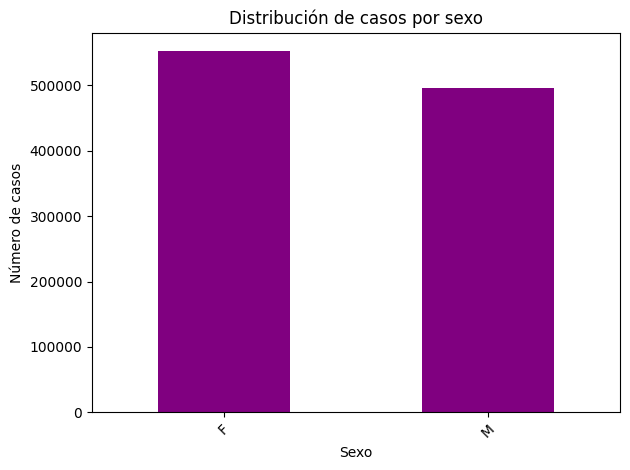

In [88]:
##se corre la linea nuevamente con el fin de verificar que se corrigió el dato duplicado
#Casos por sexo
plt.figure()
df_2['Sexo'].value_counts().plot(kind='bar', color='purple')
plt.title("Distribución de casos por sexo")
plt.xlabel("Sexo")
plt.ylabel("Número de casos")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

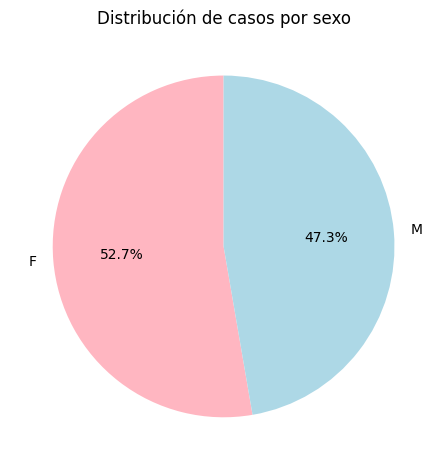

In [89]:
# Crear gráfico de torta
plt.figure()
df_2['Sexo'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightpink', 'lightblue'])
plt.title("Distribución de casos por sexo")
plt.ylabel("")  # Eliminar etiqueta del eje y
plt.tight_layout()
plt.show()

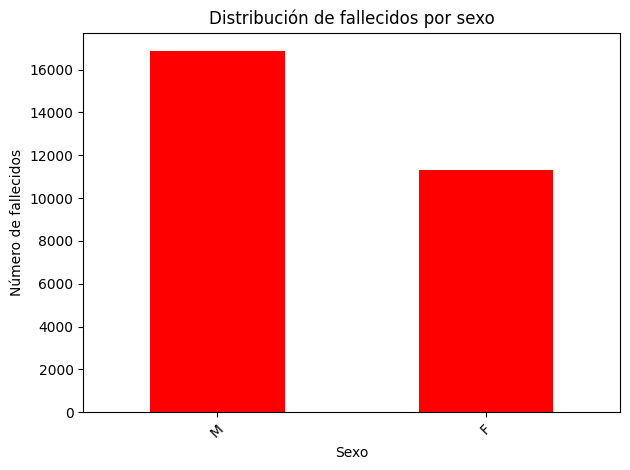

In [90]:
# Grafico de fallecidos por sexo
plt.figure()
df_2[df_2['Estado'] == 'Fallecido']['Sexo'].value_counts().plot(kind='bar', color='red')
plt.title("Distribución de fallecidos por sexo")
plt.xlabel("Sexo")
plt.ylabel("Número de fallecidos")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

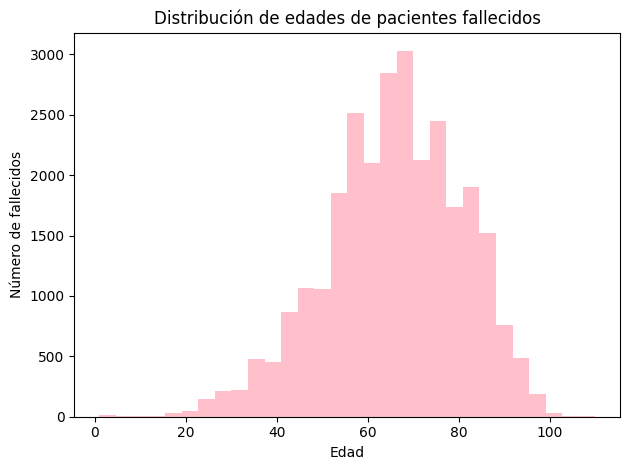

In [91]:
#Distribución de las edades de los pacientes fallecidos
plt.figure()
df_2[df_2['Recuperado'] == 'Fallecido']['Edad'].plot(kind='hist', bins=30, color='pink')
plt.title("Distribución de edades de pacientes fallecidos")
plt.xlabel("Edad")
plt.ylabel("Número de fallecidos")
plt.tight_layout()
plt.show()



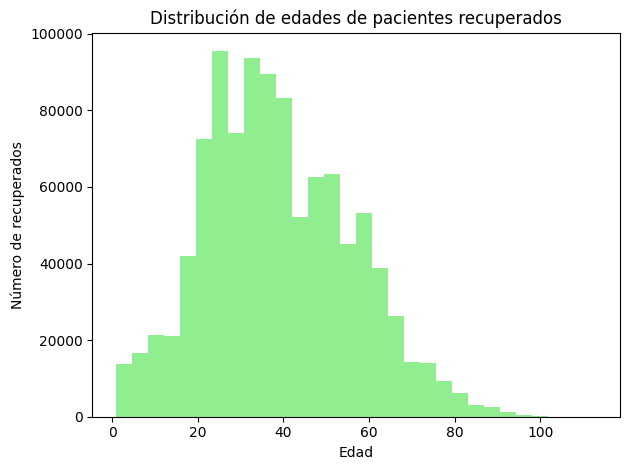

In [92]:
# Distribución de edades de los pacientes recuperados
plt.figure()
df_2[df_2['Recuperado'] == 'Recuperado']['Edad'].plot(kind='hist', bins=30, color='lightgreen')
plt.title("Distribución de edades de pacientes recuperados")
plt.xlabel("Edad")
plt.ylabel("Número de recuperados")
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

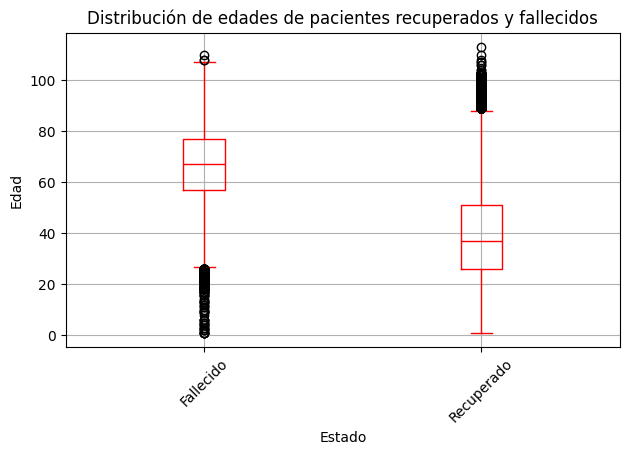

In [93]:
# Distribución de edades de los pacientes recuperados- Fallecidos- N/A
plt.figure()
df_2.boxplot(column='Edad', by='Recuperado', color='red')
plt.title("Distribución de edades de pacientes recuperados y fallecidos")
plt.suptitle("")  # Eliminar el título por defecto
plt.xlabel("Estado")
plt.ylabel("Edad")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()         

/tmp/ipykernel_12100/2291965116.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['Edad'] = pd.to_numeric(df_filtrado['Edad'], errors='coerce')
/tmp/ipykernel_12100/2291965116.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['Recuperado'] = df_filtrado['Recuperado'].astype(str)


1044712 1044712


<Figure size 1000x600 with 0 Axes>

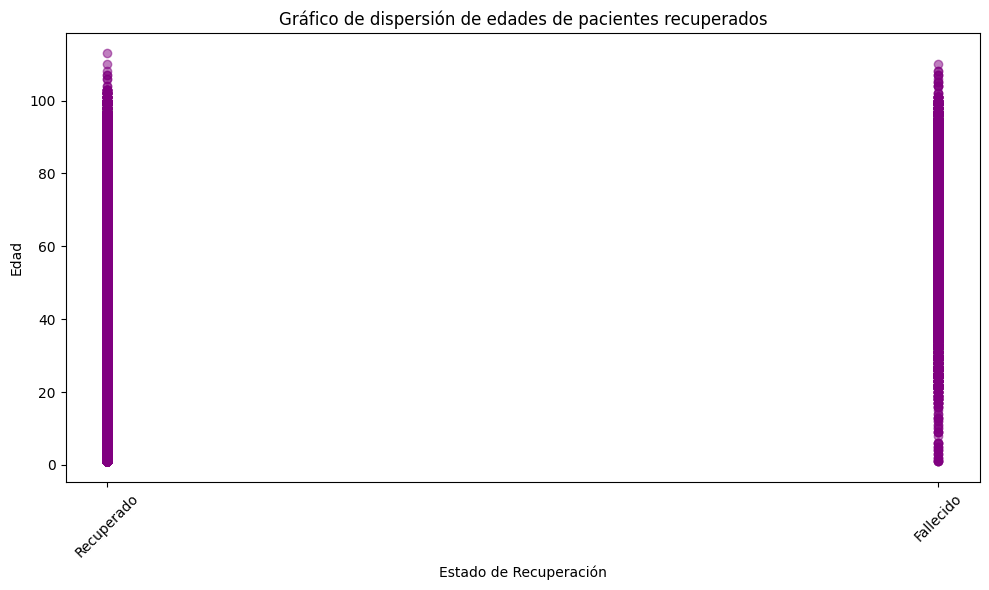

In [94]:
# Grafico de dispersion de edades de los pacientes recuperados
plt.figure(figsize=(10, 6))

# Filtrar filas donde 'Edad' y 'Recuperado' no son NaN
df_filtrado = df_2.dropna(subset=['Edad', 'Recuperado'])

# Convertir 'Edad' a numérico (en caso no lo hayas hecho ya)
df_filtrado['Edad'] = pd.to_numeric(df_filtrado['Edad'], errors='coerce')

# Convertir 'Recuperado' a texto
df_filtrado['Recuperado'] = df_filtrado['Recuperado'].astype(str)

# Confirmar tamaños iguales
print(len(df_filtrado['Recuperado']), len(df_filtrado['Edad'])) 

# Crear gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(df_filtrado['Recuperado'], df_filtrado['Edad'], color='purple', alpha=0.5)
plt.title("Gráfico de dispersión de edades de pacientes recuperados")
plt.xlabel("Estado de Recuperación")
plt.ylabel("Edad")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [95]:
df_2.shape

(1048304, 15)

In [96]:
df_2.head(10)

,ID de caso,Nombre departamento,Nombre municipio,Edad,Unidad de medida de edad,Sexo,Tipo de contagio,Ubicacion del caso,Estado,Nombre del pais,Recuperado,Fecha de inicio de sintomas,Fecha de muerte,Fecha de diagnostico,Fecha de recuperacion
0,1556979,VALLE,CALI,67,1,F,Comunitaria,Casa,Leve,NaN,Recuperado,1970-01-01 00:00:00.000044186,NaT,1970-01-01 00:00:00.000044188,1970-01-01 00:00:00.000044200
1,1556980,VALLE,CALI,66,1,F,Comunitaria,Casa,Leve,NaN,Recuperado,1970-01-01 00:00:00.000044172,NaT,1970-01-01 00:00:00.000044188,1970-01-01 00:00:00.000044190
2,1556981,VALLE,CALI,68,1,F,Comunitaria,Casa,Leve,NaN,Recuperado,1970-01-01 00:00:00.000044183,NaT,1970-01-01 00:00:00.000044187,1970-01-01 00:00:00.000044197
3,1556982,VALLE,CALI,74,1,F,Comunitaria,Fallecido,Fallecido,NaN,Fallecido,1970-01-01 00:00:00.000044182,1970-01-01 00:00:00.000044195,1970-01-01 00:00:00.000044188,NaT
4,1556983,VALLE,CALI,65,1,F,Comunitaria,Casa,Leve,NaN,Recuperado,1970-01-01 00:00:00.000044186,NaT,1970-01-01 00:00:00.000044188,1970-01-01 00:00:00.000044200
5,1556984,VALLE,CALI,66,1,F,Comunitaria,Casa,Leve,NaN,Recuperado,1970-01-01 00:00:00.000044174,NaT,1970-01-01 00:00:00.000044188,1970-01-01 00:00:00.000044190
6,1556985,VALLE,CALI,74,1,F,Comunitaria,Casa,Leve,NaN,Recuperado,1970-01-01 00:00:00.000044179,NaT,1970-01-01 00:00:00.000044187,1970-01-01 00:00:00.000044193
7,1556986,VALLE,CALI,66,1,F,Comunitaria,Fallecido,Fallecido,NaN,Fallecido,1970-01-01 00:00:00.000044176,1970-01-01 00:00:00.000044191,1970-01-01 00:00:00.000044187,NaT
8,1556987,VALLE,CALI,64,1,F,Comunitaria,Casa,Leve,NaN,Recuperado,1970-01-01 00:00:00.000044180,NaT,1970-01-01 00:00:00.000044188,1970-01-01 00:00:00.000044195
9,1556988,VALLE,CALI,65,1,F,Comunitaria,Casa,Leve,NaN,Recuperado,1970-01-01 00:00:00.000044173,NaT,1970-01-01 00:00:00.000044187,1970-01-01 00:00:00.000044190


In [97]:
df_2.head()
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1048304 entries, 0 to 1048574
Data columns (total 15 columns):
 #   Column                       Non-Null Count    Dtype         
---  ------                       --------------    -----         
 0   ID de caso                   1048304 non-null  int64         
 1   Nombre departamento          1048304 non-null  object        
 2   Nombre municipio             1048304 non-null  object        
 3   Edad                         1048304 non-null  int64         
 4   Unidad de medida de edad     1048304 non-null  int64         
 5   Sexo                         1048304 non-null  object        
 6   Tipo de contagio             1048304 non-null  object        
 7   Ubicacion del caso           1043966 non-null  object        
 8   Estado                       1043966 non-null  object        
 9   Nombre del pais              250 non-null      object        
 10  Recuperado                   1044712 non-null  object        
 11  Fecha de inicio 

## Examinar la capacidad predictiva del modelo
**Teniendo como variable objetivo los dias de recuperación**

*Los días de recuperación corresponden a "Fecha de recuperación - Fecha de inicio de síntomas"*

In [98]:
# Crear una nueva columna que corresponda al tiempo de recuperación
df_2['Tiempo de recuperacion'] = (df_2['Fecha de recuperacion'] - df_2['Fecha de inicio de sintomas']).dt.days
df_2['Tiempo de recuperacion'].describe()
df_2.head()

,ID de caso,Nombre departamento,Nombre municipio,Edad,Unidad de medida de edad,Sexo,Tipo de contagio,Ubicacion del caso,Estado,Nombre del pais,Recuperado,Fecha de inicio de sintomas,Fecha de muerte,Fecha de diagnostico,Fecha de recuperacion,Tiempo de recuperacion
0,1556979,VALLE,CALI,67,1,F,Comunitaria,Casa,Leve,NaN,Recuperado,1970-01-01 00:00:00.000044186,NaT,1970-01-01 00:00:00.000044188,1970-01-01 00:00:00.000044200,0.0
1,1556980,VALLE,CALI,66,1,F,Comunitaria,Casa,Leve,NaN,Recuperado,1970-01-01 00:00:00.000044172,NaT,1970-01-01 00:00:00.000044188,1970-01-01 00:00:00.000044190,0.0
2,1556981,VALLE,CALI,68,1,F,Comunitaria,Casa,Leve,NaN,Recuperado,1970-01-01 00:00:00.000044183,NaT,1970-01-01 00:00:00.000044187,1970-01-01 00:00:00.000044197,0.0
3,1556982,VALLE,CALI,74,1,F,Comunitaria,Fallecido,Fallecido,NaN,Fallecido,1970-01-01 00:00:00.000044182,1970-01-01 00:00:00.000044195,1970-01-01 00:00:00.000044188,NaT,NaN
4,1556983,VALLE,CALI,65,1,F,Comunitaria,Casa,Leve,NaN,Recuperado,1970-01-01 00:00:00.000044186,NaT,1970-01-01 00:00:00.000044188,1970-01-01 00:00:00.000044200,0.0


<img src="https://upload.wikimedia.org/wikipedia/commons/3/3a/Linear_regression.svg" alt="Regresión" width="100">

## **Se va a realizar la regresión**

In [99]:
!pip install scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [100]:
# Crear una nueva columna que corresponda a si el paciente se recupero o falleció, donde 1 es recuperado y 0 es fallecido
df_2['Estado_2'] = df_2['Recuperado'].map({'Fallecido': 0, 'Recuperado': 1})
df_2.head()

,ID de caso,Nombre departamento,Nombre municipio,Edad,Unidad de medida de edad,Sexo,Tipo de contagio,Ubicacion del caso,Estado,Nombre del pais,Recuperado,Fecha de inicio de sintomas,Fecha de muerte,Fecha de diagnostico,Fecha de recuperacion,Tiempo de recuperacion,Estado_2
0,1556979,VALLE,CALI,67,1,F,Comunitaria,Casa,Leve,NaN,Recuperado,1970-01-01 00:00:00.000044186,NaT,1970-01-01 00:00:00.000044188,1970-01-01 00:00:00.000044200,0.0,1.0
1,1556980,VALLE,CALI,66,1,F,Comunitaria,Casa,Leve,NaN,Recuperado,1970-01-01 00:00:00.000044172,NaT,1970-01-01 00:00:00.000044188,1970-01-01 00:00:00.000044190,0.0,1.0
2,1556981,VALLE,CALI,68,1,F,Comunitaria,Casa,Leve,NaN,Recuperado,1970-01-01 00:00:00.000044183,NaT,1970-01-01 00:00:00.000044187,1970-01-01 00:00:00.000044197,0.0,1.0
3,1556982,VALLE,CALI,74,1,F,Comunitaria,Fallecido,Fallecido,NaN,Fallecido,1970-01-01 00:00:00.000044182,1970-01-01 00:00:00.000044195,1970-01-01 00:00:00.000044188,NaT,NaN,0.0
4,1556983,VALLE,CALI,65,1,F,Comunitaria,Casa,Leve,NaN,Recuperado,1970-01-01 00:00:00.000044186,NaT,1970-01-01 00:00:00.000044188,1970-01-01 00:00:00.000044200,0.0,1.0
